<a href="https://colab.research.google.com/github/Ayyaz-Qamar/Ayyaz-Qamar/blob/main/Kidney_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Basics Libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [2]:
#Import Data

from google.colab import files
uploaded=files.upload()
df=pd.read_csv("/content/kidney_Dataset.csv")
df.head()

Saving kidney_Dataset.csv to kidney_Dataset (1).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(399, 26)

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,399.000000,390.000000,387.000000,352.000000,353.000000,350.000000,355.000000,380.000000,382.000000,312.000000,311.000000,347.000000
mean,199.000000,51.576923,76.511628,1.017401,1.019830,0.451429,148.132394,57.445263,3.077880,137.536859,4.626367,12.521614
std,115.325626,17.107342,13.675618,0.005698,1.353511,1.100500,79.372945,50.568146,5.747672,10.424484,3.199014,2.915401
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.500000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.000000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.600000
75%,298.500000,64.750000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,398.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              399 non-null    int64  
 1   age             390 non-null    float64
 2   bp              387 non-null    float64
 3   sg              352 non-null    float64
 4   al              353 non-null    float64
 5   su              350 non-null    float64
 6   rbc             247 non-null    object 
 7   pc              334 non-null    object 
 8   pcc             395 non-null    object 
 9   ba              395 non-null    object 
 10  bgr             355 non-null    float64
 11  bu              380 non-null    float64
 12  sc              382 non-null    float64
 13  sod             312 non-null    float64
 14  pot             311 non-null    float64
 15  hemo            347 non-null    float64
 16  pcv             329 non-null    object 
 17  wc              294 non-null    obj

In [8]:
# Handling Missing Values

df.isnull().sum().sort_values(ascending=True)

,0
id,0
classification,0
appet,1
ane,1
pe,1
htn,2
cad,2
dm,2
ba,4
pcc,4


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
plt.figure(figsize=(22, 18), dpi=400, facecolor='#1f4e79')
cmap = sns.color_palette(["#1f4e79", "#FFD700"])

sns.heatmap(
    df.isnull(),
    cmap=cmap,
    cbar=False,
    linewidths=0.8,
    linecolor='gray',
    yticklabels=False
)

plt.title('Missing Values Heatmap of CKD Dataset', fontsize=34, fontweight='bold', pad=30, color='white')
plt.xlabel('Features', fontsize=28, fontweight='bold', color='yellow')
plt.ylabel('Samples', fontsize=28, fontweight='bold', color='yellow')
plt.xticks(rotation=45, ha='right', fontsize=26, fontweight='bold', color='yellow')
plt.yticks(fontsize=22, fontweight='bold', color='yellow')

plt.tight_layout()
plt.show()


In [10]:
mode=SimpleImputer(missing_values = np.nan , strategy = "most_frequent")
df_clean=pd.DataFrame(mode.fit_transform(df))
df_clean.columns=df.columns
df_clean

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,394,50.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,45,9500,4.6,no,no,no,good,no,no,notckd
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [11]:
df_clean.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [12]:
# Convert pcv , wc and rc to numerical type

df_clean['pcv'] = pd.to_numeric(df_clean['pcv'], errors='coerce')
df_clean['wc'] = pd.to_numeric(df_clean['wc'], errors='coerce')
df_clean['rc'] = pd.to_numeric(df_clean['rc'], errors='coerce')

In [13]:
df.select_dtypes(exclude = ['object']).columns
for i in df.select_dtypes(exclude = ['object']).columns:
    df_clean[i] = df_clean[i].apply(lambda x: float(x))

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              399 non-null    float64
 1   age             399 non-null    float64
 2   bp              399 non-null    float64
 3   sg              399 non-null    float64
 4   al              399 non-null    float64
 5   su              399 non-null    float64
 6   rbc             399 non-null    object 
 7   pc              399 non-null    object 
 8   pcc             399 non-null    object 
 9   ba              399 non-null    object 
 10  bgr             399 non-null    float64
 11  bu              399 non-null    float64
 12  sc              399 non-null    float64
 13  sod             399 non-null    float64
 14  pot             399 non-null    float64
 15  hemo            399 non-null    float64
 16  pcv             398 non-null    float64
 17  wc              398 non-null    flo

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              399 non-null    int64  
 1   age             390 non-null    float64
 2   bp              387 non-null    float64
 3   sg              352 non-null    float64
 4   al              353 non-null    float64
 5   su              350 non-null    float64
 6   rbc             247 non-null    object 
 7   pc              334 non-null    object 
 8   pcc             395 non-null    object 
 9   ba              395 non-null    object 
 10  bgr             355 non-null    float64
 11  bu              380 non-null    float64
 12  sc              382 non-null    float64
 13  sod             312 non-null    float64
 14  pot             311 non-null    float64
 15  hemo            347 non-null    float64
 16  pcv             329 non-null    object 
 17  wc              294 non-null    obj

In [16]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df_clean.columns if df_clean[col].dtype == 'object']
num_cols = [col for col in df_clean.columns if df_clean[col].dtype != 'object']

In [17]:
#Exploring Unique Values in Columns

for i in df_clean.columns:
  print("*****************" , i ,"******************")
  print()
  print(set(df[i].tolist()))
  print()

***************** id ******************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213

In [18]:
# Handling Ambiguities

print(df_clean["rc"].mode())
print(df_clean["wc"].mode())
print(df_clean["pcv"].mode())

0    5.2
Name: rc, dtype: float64
0    9800.0
Name: wc, dtype: float64
0    41.0
Name: pcv, dtype: float64


In [19]:
df_clean["classification"] = df_clean["classification"].apply(lambda x :"ckd" if x=="ckd\t" else x)
df_clean["cad"] = df_clean["cad"].apply(lambda x: "no" if x == "\tno" else x)

df_clean["dm"] = df_clean["dm"].apply(lambda x :"no" if x=="\tno" else x)
df_clean["dm"] = df_clean["dm"].apply(lambda x :"yes" if x=="\tyes" else x)
df_clean["dm"] = df_clean["dm"].apply(lambda x :"yes" if x=="\yes" else x)

df_clean["rc"] = df_clean["rc"].apply(lambda x :"5.2" if x=="\tno?" else x)

df_clean["wc"] = df_clean["rc"].apply(lambda x :"9800" if x=="\t8400" else x)
df_clean["wc"] = df_clean["rc"].apply(lambda x :"9800" if x=="\t6200" else x)
df_clean["wc"] = df_clean["rc"].apply(lambda x :"9800" if x=="\t?" else x)

df_clean["pcv"] = df_clean["pcv"].apply(lambda x :"41" if x=="\t?" else x)
df_clean["pcv"] = df_clean["pcv"].apply(lambda x :"41" if x=="\t43" else x)

In [20]:
df_clean

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,5.2,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,5.2,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,5.2,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,3.9,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,4.6,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,394.0,50.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,45.0,4.6,4.6,no,no,no,good,no,no,notckd
395,395.0,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,4.9,4.9,no,no,no,good,no,no,notckd
396,396.0,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,6.2,6.2,no,no,no,good,no,no,notckd
397,397.0,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,5.4,5.4,no,no,no,good,no,no,notckd


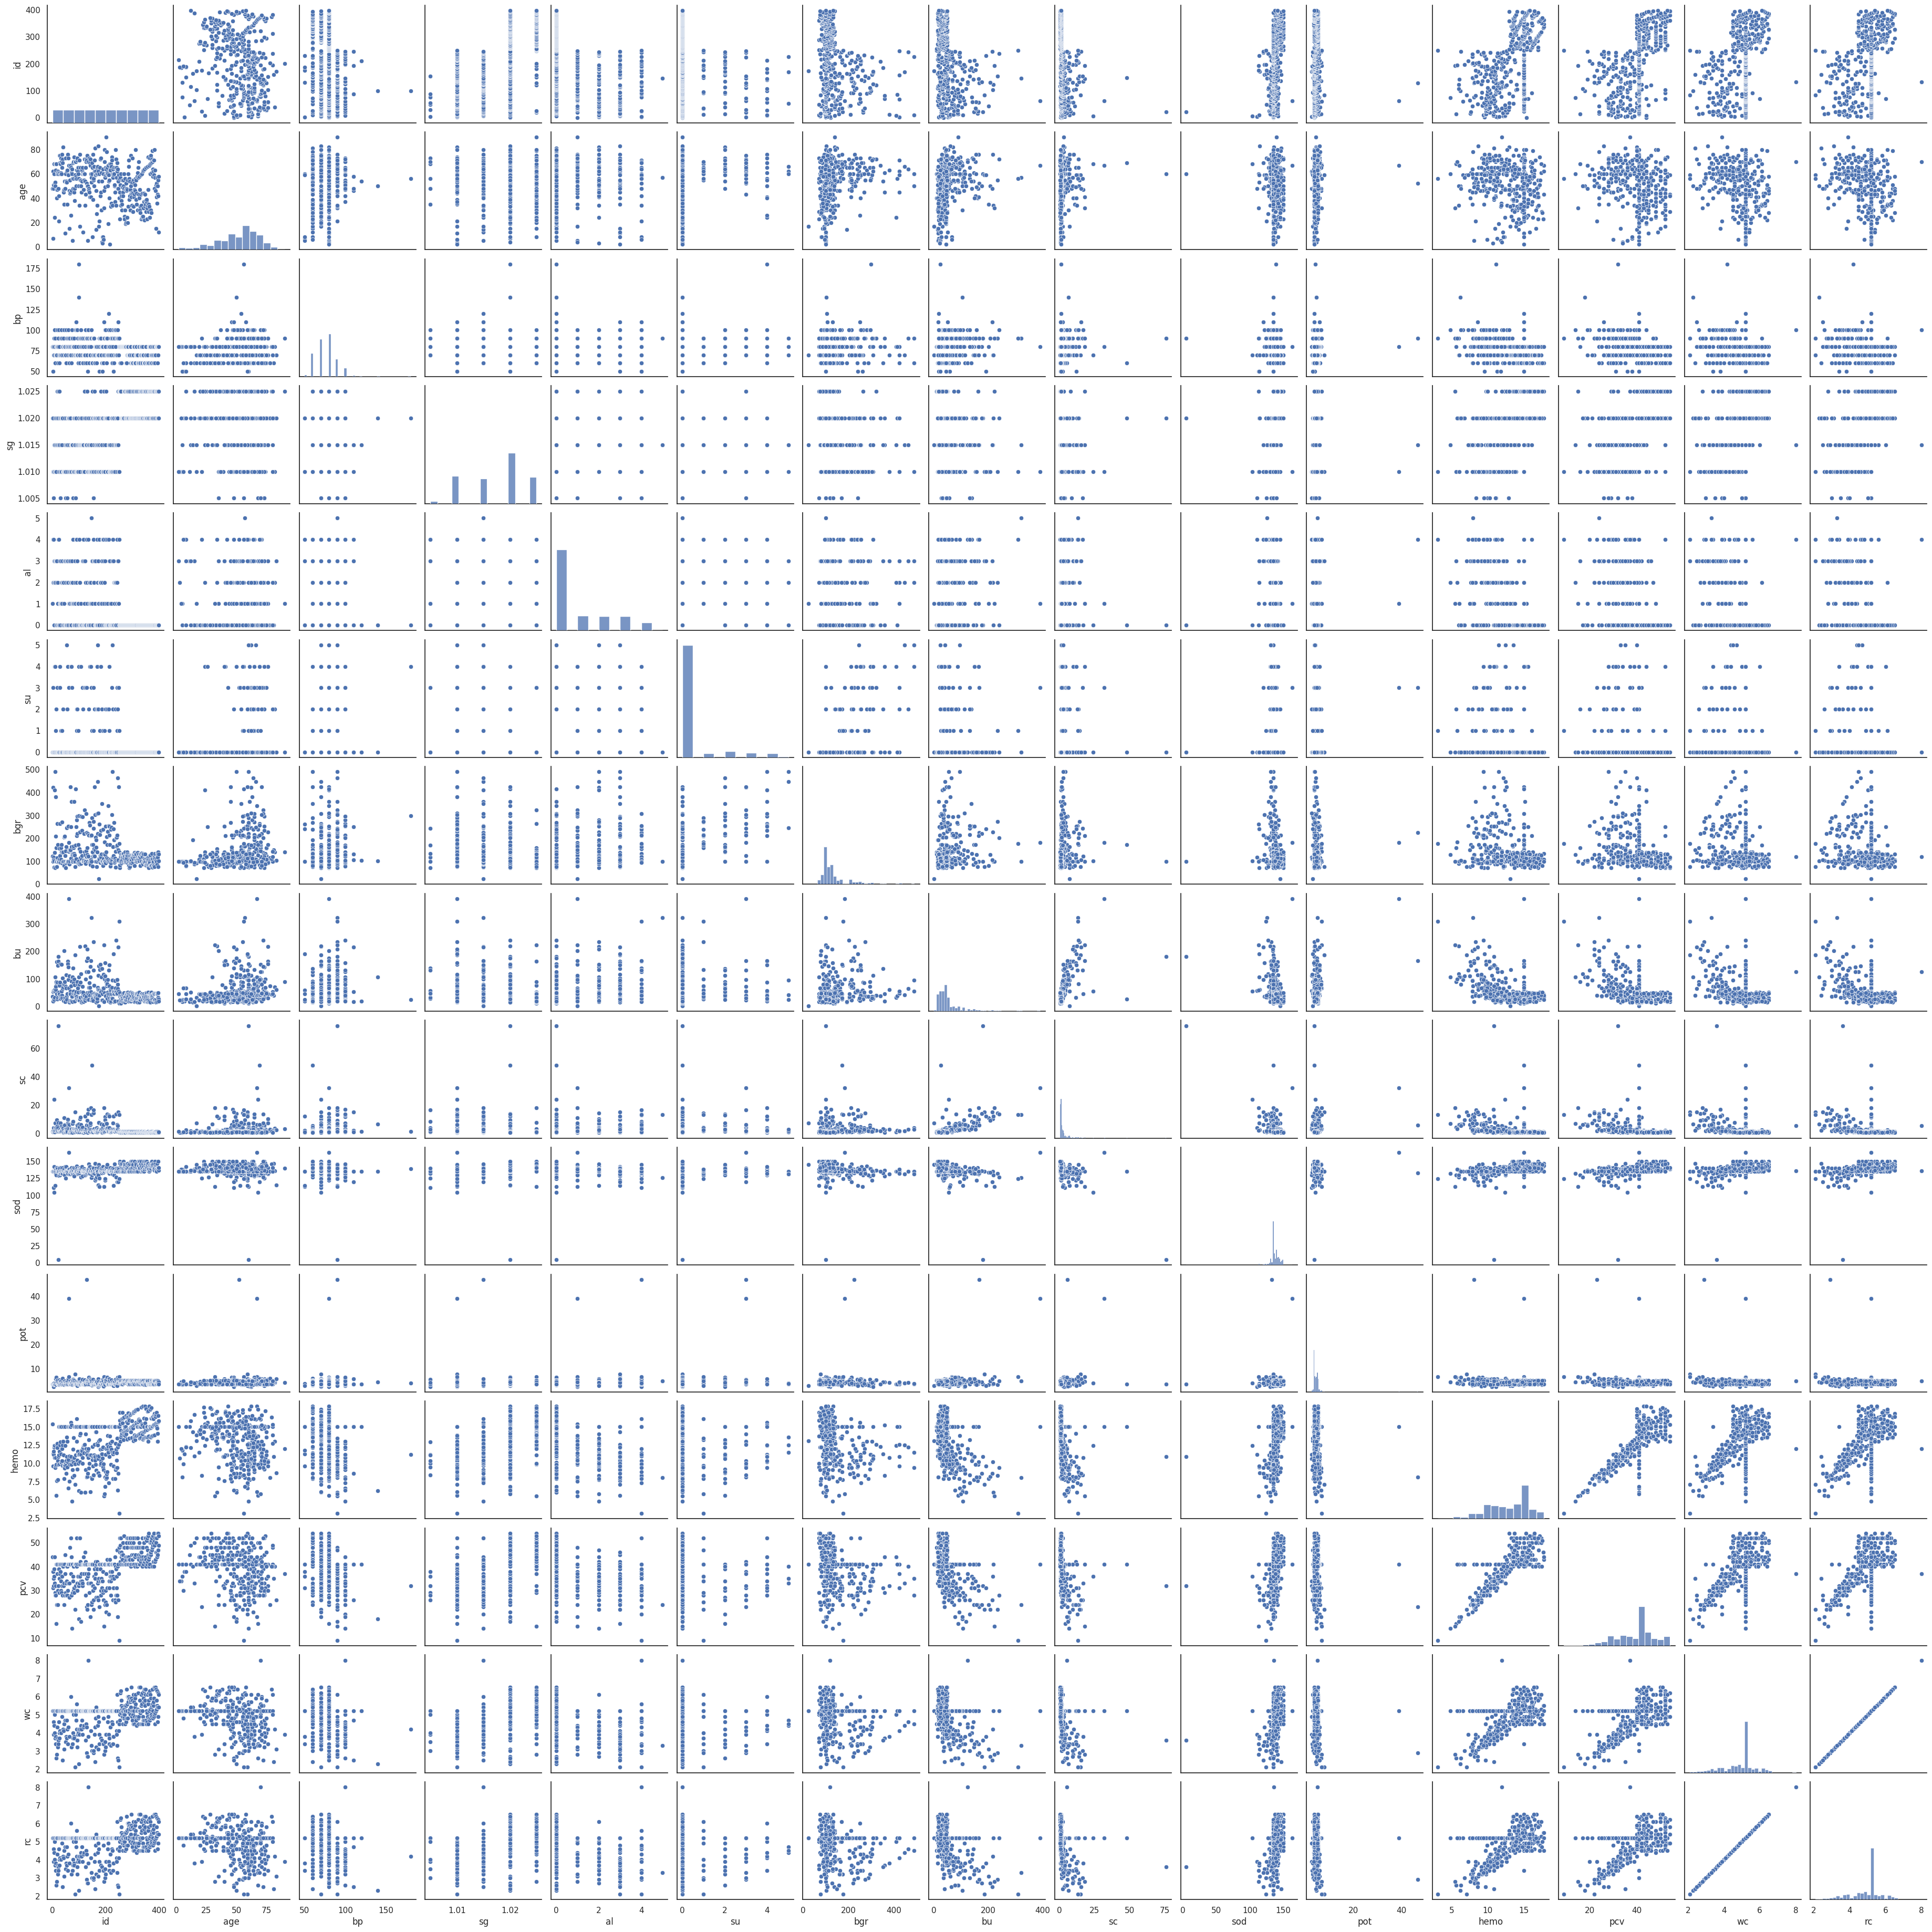

In [21]:
sns.pairplot(df_clean)

In [22]:
def distplot_plotly(col):
    fig = px.histogram(df, x=col, nbins=15, title=f'Distribution of {col}')
    fig.update_layout(
        plot_bgcolor='black',
        paper_bgcolor='black',
        font_color='white'
    )
    fig.show()
for col in df.select_dtypes(include='number').columns:
    distplot_plotly(col)